## Drive and Dependecies


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/cicddos2019/03-11

/content/drive/MyDrive/cicddos2019/03-11


In [ ]:
%ls

7_classes/                     clean_3_without_timestamp.csv    NetBIOS.csv
binary_balanced_dataset.csv    complete_dataset.csv             Portmap.csv
binary_dataset.csv             LDAP.csv                         Syn.csv
clean_1.csv                    MSSQL.csv                        UDP.csv
clean_2_wihtout_timestamp.csv  multiclass_balanced_dataset.csv  UDPLag.csv
clean_2_with_timestamp.csv     multiclass_dataset.csv


In [ ]:
import pandas as pd
from google.colab import files
pd.options.display.max_rows = 99999
pd.set_option('max_colwidth', 400)
#df=pd.read_csv('./clean_1.csv')

## Feature Engineering

In [ ]:
import pandas as pd
df = pd.read_csv("./binary_balanced_dataset.csv")
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661740 entries, 0 to 2661739
Data columns (total 38 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Unnamed: 0                   int64  
 1    Source IP                   int64  
 2    Source Port                 int64  
 3    Destination IP              int64  
 4    Destination Port            int64  
 5    Protocol                    int64  
 6   Total Length of Fwd Packets  float64
 7    Fwd Packet Length Max       float64
 8    Fwd Packet Length Min       float64
 9    Fwd Packet Length Mean      float64
 10  Bwd Packet Length Max        float64
 11   Bwd Packet Length Min       float64
 12   Bwd Packet Length Mean      float64
 13   Bwd Packet Length Std       float64
 14  Flow Bytes/s                 float64
 15   Flow Packets/s              float64
 16   Flow IAT Mean               float64
 17   Flow IAT Std                float64
 18   Fwd IAT Mean                float64
 19  

In [ ]:
df.describe()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,...,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2661740.0
mean,1.330870e+06,2.938978e+09,3.441955e+04,2.481450e+09,2.178314e+04,1.214675e+01,7.770397e+02,2.243983e+02,1.458072e+02,1.614062e+02,...,9.710340e-02,2.442010e+02,1.614062e+02,5.063781e+01,7.769003e+02,3.186856e+03,1.365965e+03,3.113113e+05,5.987959e-01,0.5
std,7.683783e+05,4.796158e+08,2.558350e+04,1.236417e+09,2.310603e+04,5.516421e+00,2.592870e+03,3.256718e+02,2.049293e+02,2.038392e+02,...,2.960986e-01,2.977529e+02,2.038392e+02,1.646049e+02,2.592836e+03,6.984223e+03,6.510734e+03,1.941912e+06,4.901423e-01,0.5
min,0.000000e+00,0.000000e+00,0.000000e+00,6.724045e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,6.654348e+05,2.886730e+09,8.180000e+02,1.747480e+09,4.430000e+02,6.000000e+00,3.700000e+01,6.000000e+00,6.000000e+00,6.000000e+00,...,0.000000e+00,9.000000e+00,6.000000e+00,0.000000e+00,3.700000e+01,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,1.330870e+06,2.886730e+09,4.641200e+04,3.232248e+09,1.278500e+04,1.700000e+01,3.572264e+02,9.000000e+01,3.790967e+01,4.690450e+01,...,0.000000e+00,8.837832e+01,4.690450e+01,0.000000e+00,3.570000e+02,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,0.5
75%,1.996304e+06,3.232248e+09,5.695200e+04,3.232248e+09,4.421600e+04,1.700000e+01,7.660000e+02,3.740000e+02,2.290000e+02,2.290000e+02,...,0.000000e+00,3.435000e+02,2.290000e+02,3.087547e+01,7.660000e+02,5.840000e+03,0.000000e+00,0.000000e+00,1.000000e+00,1.0
max,2.661739e+06,3.715790e+09,6.553200e+04,4.294967e+09,6.553500e+04,1.700000e+01,1.509340e+05,3.617000e+03,2.131000e+03,2.131000e+03,...,1.000000e+00,2.208000e+03,2.131000e+03,1.843202e+03,1.509340e+05,6.553500e+04,6.553500e+04,6.188006e+07,1.000000e+00,1.0


In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(100,200))
cor = normalized_df.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#df=df.drop('Unnamed: 0.1',axis=1)
normalized_df.head()

,Unnamed: 0,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
0,-1.732050,-0.108937,-1.311375,0.607237,-0.816892,0.879782,-0.136929,-0.041140,0.318124,0.243298,...,-0.327943,0.242815,0.243298,-0.307632,-0.136877,-0.456437,-0.209956,-0.160312,0.818546,1.0
1,-1.732049,-0.108937,-1.311335,0.607237,1.385477,0.879782,-0.095277,0.124671,0.581629,0.508213,...,-0.327943,0.514853,0.508213,-0.307632,-0.095224,-0.456437,-0.209956,-0.160312,0.818546,1.0
2,-1.732047,-0.108937,-1.320052,0.607237,0.816967,0.879782,-0.123045,0.014130,0.405959,0.331603,...,-0.327943,0.333495,0.331603,-0.307632,-0.122993,-0.456437,-0.209956,-0.160312,0.818546,1.0
3,-1.732046,-0.108937,-1.311296,0.607237,1.407635,0.879782,-0.123045,0.014130,0.405959,0.331603,...,-0.327943,0.333495,0.331603,-0.307632,-0.122993,-0.456437,-0.209956,-0.160312,0.818546,1.0
4,-1.732045,-0.108937,-1.311257,0.607237,0.816664,0.879782,-0.123045,0.014130,0.405959,0.331603,...,-0.327943,0.333495,0.331603,-0.307632,-0.122993,-0.456437,-0.209956,-0.160312,0.818546,1.0


In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_df.describe()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound,Label
count,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,...,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06
mean,1.995053e-16,-2.135574e-17,6.994431e-16,-3.673187e-17,3.625350e-16,1.382677e-16,7.260951e-16,-3.997794e-17,-6.703993e-16,-1.199338e-16,...,-2.625901e-16,3.545052e-16,-6.703993e-16,6.731328e-17,2.106743e-17,-2.074069e-16,-9.311101e-17,1.582994e-18,7.069603e-16,-8.200603e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.127774e+00,-1.345381e+00,-1.952585e+00,-9.427471e-01,-2.201926e+00,-2.996832e-01,-6.890320e-01,-7.114997e-01,-7.918313e-01,-2.876958e-01,...,-3.279428e-01,-8.201467e-01,-7.918313e-01,-3.076324e-01,-2.996335e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,-1.221678e+00,-9.999998e-01
25%,-1.089367e-01,-1.313407e+00,-5.936264e-01,-9.235746e-01,-1.114264e+00,-2.854133e-01,-6.706086e-01,-6.822213e-01,-7.623964e-01,-2.876958e-01,...,-3.279428e-01,-7.899203e-01,-7.623964e-01,-3.076324e-01,-2.853634e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,-1.221678e+00,-9.999998e-01
50%,-1.089367e-01,4.687575e-01,6.072370e-01,-3.894282e-01,8.797822e-01,-1.619106e-01,-4.126802e-01,-5.265107e-01,-5.617259e-01,-2.876958e-01,...,-3.279428e-01,-5.233290e-01,-5.617259e-01,-3.076324e-01,-1.619464e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,8.185462e-01,0.000000e+00
75%,6.114703e-01,8.807418e-01,6.072370e-01,9.708663e-01,8.797822e-01,-4.257700e-03,4.593634e-01,4.059587e-01,3.316034e-01,-2.008053e-01,...,-3.279428e-01,3.334945e-01,3.316034e-01,-1.200592e-01,-4.204016e-03,3.798768e-01,-2.098019e-01,-1.603118e-01,8.185462e-01,9.999998e-01
max,1.619655e+00,1.216114e+00,1.466752e+00,1.893526e+00,8.797822e-01,5.791148e+01,1.041724e+01,9.687207e+00,9.662489e+00,6.785548e+00,...,3.049311e+00,6.595399e+00,9.662489e+00,1.089010e+01,5.791231e+01,8.926998e+00,9.855883e+00,3.170522e+01,8.185462e-01,9.999998e-01


In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
normalized_x.describe()

,Source IP,Source Port,Destination IP,Destination Port,Protocol,Total Length of Fwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Bwd Packet Length Max,...,URG Flag Count,CWE Flag Count,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Subflow Fwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,Idle Std,Inbound
count,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,...,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06,2.661740e+06
mean,1.995053e-16,-2.135574e-17,6.994431e-16,-3.673187e-17,3.625350e-16,1.382677e-16,7.260951e-16,-3.997794e-17,-6.703993e-16,-1.199338e-16,...,-2.859960e-16,-2.625901e-16,3.545052e-16,-6.703993e-16,6.731328e-17,2.106743e-17,-2.074069e-16,-9.311101e-17,1.582994e-18,7.069603e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-6.127774e+00,-1.345381e+00,-1.952585e+00,-9.427471e-01,-2.201926e+00,-2.996832e-01,-6.890320e-01,-7.114997e-01,-7.918313e-01,-2.876958e-01,...,-5.305054e-01,-3.279428e-01,-8.201467e-01,-7.918313e-01,-3.076324e-01,-2.996335e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,-1.221678e+00
25%,-1.089367e-01,-1.313407e+00,-5.936264e-01,-9.235746e-01,-1.114264e+00,-2.854133e-01,-6.706086e-01,-6.822213e-01,-7.623964e-01,-2.876958e-01,...,-5.305054e-01,-3.279428e-01,-7.899203e-01,-7.623964e-01,-3.076324e-01,-2.853634e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,-1.221678e+00
50%,-1.089367e-01,4.687575e-01,6.072370e-01,-3.894282e-01,8.797822e-01,-1.619106e-01,-4.126802e-01,-5.265107e-01,-5.617259e-01,-2.876958e-01,...,-5.305054e-01,-3.279428e-01,-5.233290e-01,-5.617259e-01,-3.076324e-01,-1.619464e-01,-4.564367e-01,-2.099555e-01,-1.603118e-01,8.185462e-01
75%,6.114703e-01,8.807418e-01,6.072370e-01,9.708663e-01,8.797822e-01,-4.257700e-03,4.593634e-01,4.059587e-01,3.316034e-01,-2.008053e-01,...,-5.305054e-01,-3.279428e-01,3.334945e-01,3.316034e-01,-1.200592e-01,-4.204016e-03,3.798768e-01,-2.098019e-01,-1.603118e-01,8.185462e-01
max,1.619655e+00,1.216114e+00,1.466752e+00,1.893526e+00,8.797822e-01,5.791148e+01,1.041724e+01,9.687207e+00,9.662489e+00,6.785548e+00,...,1.884994e+00,3.049311e+00,6.595399e+00,9.662489e+00,1.089010e+01,5.791231e+01,8.926998e+00,9.855883e+00,3.170522e+01,8.185462e-01


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train = np.array(y_train)

In [ ]:
normalized_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661740 entries, 0 to 2661739
Data columns (total 35 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Source IP                   float64
 1    Source Port                 float64
 2    Destination IP              float64
 3    Destination Port            float64
 4    Protocol                    float64
 5   Total Length of Fwd Packets  float64
 6    Fwd Packet Length Max       float64
 7    Fwd Packet Length Min       float64
 8    Fwd Packet Length Mean      float64
 9   Bwd Packet Length Max        float64
 10   Bwd Packet Length Min       float64
 11   Bwd Packet Length Mean      float64
 12   Bwd Packet Length Std       float64
 13   Flow IAT Mean               float64
 14   Flow IAT Std                float64
 15   Fwd IAT Mean                float64
 16   Fwd IAT Std                 float64
 17  Fwd PSH Flags                float64
 18  Fwd Packets/s                float64
 19  

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661740 entries, 0 to 2661739
Data columns (total 1 columns):
 #   Column  Dtype
---  ------  -----
 0   Label   int64
dtypes: int64(1)
memory usage: 20.3 MB


## Stochastic Gradient Descent

In [ ]:
#stochastic gradient descent
from  sklearn.linear_model import SGDClassifier, LinearRegression
from sklearn import metrics
lr = SGDClassifier(loss="log", penalty="l2", max_iter=200)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(loss='log', max_iter=200)

In [ ]:
y_pred = lr.predict(X_test)
print("Stochastic Gradient Descent\nAccuracy =", metrics.accuracy_score(y_test, y_pred)*100)

Stochastic Gradient Descent
Accuracy = 99.7872068646825


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
print('Stochastic Gradient Descent')

print('Accuracy = ', metrics.accuracy_score(y_test, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                 digits=2,
                                                                 output_dict=False))

print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Stochastic Gradient Descent
Accuracy =  99.7872068646825
Confusion Matrix =
 [[331563   1207]
 [   209 332456]]
Recall = 0.997872068646825
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    332770
           1       1.00      1.00      1.00    332665

    accuracy                           1.00    665435
   macro avg       1.00      1.00      1.00    665435
weighted avg       1.00      1.00      1.00    665435

F1 Score =  0.9978720648146086


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('Naive Bayes')

print('Accuracy = ', metrics.accuracy_score(y_test,y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test, y_pred, average='macro'))

Naive Bayes
Accuracy =  99.73731468888772
Confusion Matrix =
 [[332522    248]
 [  1500 331165]]
Recall = 0.9973731468888772
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    332770
           1       1.00      1.00      1.00    332665

    accuracy                           1.00    665435
   macro avg       1.00      1.00      1.00    665435
weighted avg       1.00      1.00      1.00    665435

F1 Score =  0.9973731359647685


## KNN Classifier

In [ ]:
import pandas as pd
df = pd.read_csv("./binary_balanced_dataset.csv")
df = df.sample(frac=0.10)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
print("x\n",x.info())
y = pd.DataFrame(y)
print('y\n',y.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266174 entries, 729659 to 2078627
Data columns (total 38 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   266174 non-null  int64  
 1    Source IP                   266174 non-null  int64  
 2    Source Port                 266174 non-null  int64  
 3    Destination IP              266174 non-null  int64  
 4    Destination Port            266174 non-null  int64  
 5    Protocol                    266174 non-null  int64  
 6   Total Length of Fwd Packets  266174 non-null  float64
 7    Fwd Packet Length Max       266174 non-null  float64
 8    Fwd Packet Length Min       266174 non-null  float64
 9    Fwd Packet Length Mean      266174 non-null  float64
 10  Bwd Packet Length Max        266174 non-null  float64
 11   Bwd Packet Length Min       266174 non-null  float64
 12   Bwd Packet Length Mean      266174 non-null  float6

In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Nearest Neighbour Classifier')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

K Nearest Neighbour Classifier
Accuracy =  99.99849723491224
Confusion Matrix =
 [[33281     0]
 [    1 33262]]
Recall = 0.9999849723491224
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33281
           1       1.00      1.00      1.00     33263

    accuracy                           1.00     66544
   macro avg       1.00      1.00      1.00     66544
weighted avg       1.00      1.00      1.00     66544

F1 Score =  0.9999849723478973




## Support Vector Machine

In [ ]:
import pandas as pd
df = pd.read_csv("./binary_balanced_dataset.csv")
df = df.sample(frac=0.10)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
y = pd.DataFrame(y)


In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:
df1=pd.DataFrame(y_train_10)
df1.value_counts()

0    99987
1    99643
dtype: int64

In [ ]:
df1=pd.DataFrame(y_test_10)
df1.value_counts()

Label
0        33392
1        33152
dtype: int64

In [ ]:

from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM Linear kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM Linear kernel
Accuracy =  99.95491704736715
Confusion Matrix =
 [[33392     0]
 [   30 33122]]
Recall = 0.9995491704736715
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33392
           1       1.00      1.00      1.00     33152

    accuracy                           1.00     66544
   macro avg       1.00      1.00      1.00     66544
weighted avg       1.00      1.00      1.00     66544

F1 Score =  0.9995491630515302


In [ ]:

from sklearn import svm
model = svm.SVC(kernel='sigmoid')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM Sigmoid kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM Sigmoid kernel
Accuracy =  96.09581630199567
Confusion Matrix =
 [[32060  1332]
 [ 1266 31886]]
Recall = 0.9609581630199567
Classification Report =
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     33392
           1       0.96      0.96      0.96     33152

    accuracy                           0.96     66544
   macro avg       0.96      0.96      0.96     66544
weighted avg       0.96      0.96      0.96     66544

F1 Score =  0.9609578960798046


In [ ]:

from sklearn import svm
model = svm.SVC(kernel='rbf')
model.fit(X_train_10, y_train_10)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
y_pred = model.predict(X_test_10)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('SVM RBF kernel')

print('Accuracy = ', metrics.accuracy_score(y_test_10, y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

SVM RBF kernel
Accuracy =  99.98497234912239
Confusion Matrix =
 [[33392     0]
 [   10 33142]]
Recall = 0.9998497234912238
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     33392
           1       1.00      1.00      1.00     33152

    accuracy                           1.00     66544
   macro avg       1.00      1.00      1.00     66544
weighted avg       1.00      1.00      1.00     66544

F1 Score =  0.9998497213701322


## K Means Classifier

In [ ]:
import pandas as pd
df = pd.read_csv("./binary_balanced_dataset.csv")
df = df.sample(frac=0.010)
#df.info()
#df=df.drop('Unnamed: 0.1',axis=1)
x=df.drop('Label',axis='columns')
y=df.Label
y = pd.DataFrame(y)

In [ ]:
#normalizating the data
#df.iloc[:,df.columns != ' Flow Packets/s' or df.columns != 'Flow Bytes/s']
normalized_df=(df-df.mean())/df.std()
normalized_df=normalized_df.drop(' Flow Packets/s',axis=1)
normalized_df=normalized_df.drop('Flow Bytes/s',axis=1)

In [ ]:
normalized_df=normalized_df.drop('Unnamed: 0', axis=1)
#normalized_df=normalized_df.drop('Unnamed: 0.1.1', axis=1)

In [ ]:
y=pd.DataFrame(y)

In [ ]:
normalized_x=normalized_df.iloc[:,normalized_df.columns != 'Label']

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(normalized_x, y, test_size=0.25, random_state=0)
y_train_10 = np.array(y_train_10)

In [ ]:
df1=pd.DataFrame(y_train_10)
df1.value_counts()

1    10100
0     9862
dtype: int64

In [ ]:
df1=pd.DataFrame(y_test_10)
df1.value_counts()

Label
1        3377
0        3278
dtype: int64

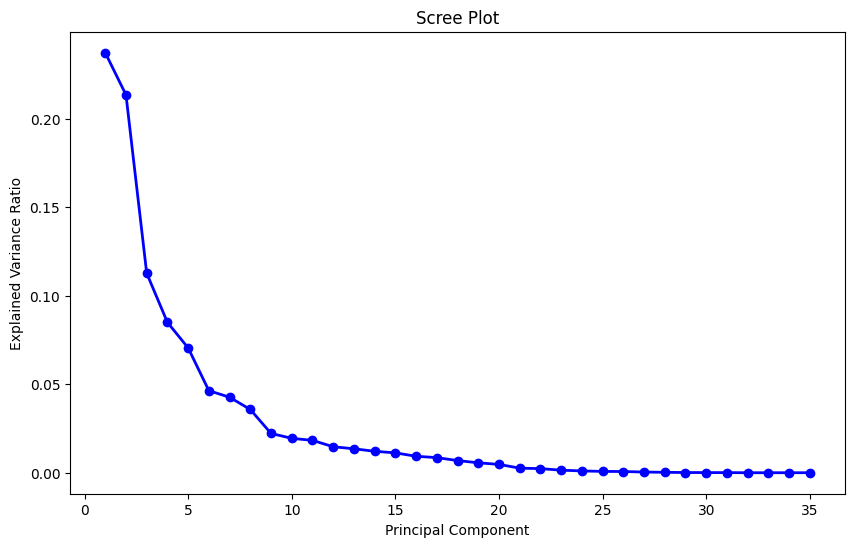

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA()
pca.fit(X_train_10)
PC_components = np.arange(pca.n_components_) + 1

plt.figure(figsize=(10, 6))
plt.plot(PC_components, pca.explained_variance_ratio_, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()



#pca_num_components = 28

#reduced_data = PCA(n_components=pca_num_components).fit_transform(X_train_10)
#results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
#results = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(pca_num_components)])


#sns.scatterplot(x="pca1", y="pca2", hue = fits[0].labels_, data=results)
#plt.title('K-means Clustering with 2 clusters')
#plt.show()

#sns.scatterplot(data = X_train_10, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

In [ ]:
n_components = 25

# Fit Transform the data using the chosen number of components
pca = PCA(n_components=n_components)
df_pca = pd.DataFrame(pca.fit_transform(X_train_10), columns=[f'PC{i+1}' for i in range(n_components)])
y_train_10_df=pd.DataFrame(y_train_10)
# Concatenate the transformed data with the target column
#df_pca = pd.concat([df_pca, y_train_10_df], axis=1)


In [ ]:
n_components = 25

# Fit Transform the data using the chosen number of components
pca = PCA(n_components=n_components)
pca.fit(X_test_10)
X_test_10_pca=X_test_10.reindex(columns=X_test_10.columns, fill_value=0)
df_pca_test = pd.DataFrame(pca.transform(X_test_10_pca), columns=[f'PC{i+1}' for i in range(n_components)])
y_test_10_df=pd.DataFrame(y_test_10)
# Concatenate the transformed data with the target column
#df_pca_test = pd.concat([df_pca_test, y_test_10_df], axis=1)


In [ ]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19962 entries, 0 to 19961
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     19962 non-null  float64
 1   PC2     19962 non-null  float64
 2   PC3     19962 non-null  float64
 3   PC4     19962 non-null  float64
 4   PC5     19962 non-null  float64
 5   PC6     19962 non-null  float64
 6   PC7     19962 non-null  float64
 7   PC8     19962 non-null  float64
 8   PC9     19962 non-null  float64
 9   PC10    19962 non-null  float64
 10  PC11    19962 non-null  float64
 11  PC12    19962 non-null  float64
 12  PC13    19962 non-null  float64
 13  PC14    19962 non-null  float64
 14  PC15    19962 non-null  float64
 15  PC16    19962 non-null  float64
 16  PC17    19962 non-null  float64
 17  PC18    19962 non-null  float64
 18  PC19    19962 non-null  float64
 19  PC20    19962 non-null  float64
 20  PC21    19962 non-null  float64
 21  PC22    19962 non-null  float64
 22

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state = 0)
model.fit(df_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
y_pred = model.predict(df_pca_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Means Classifier')


# check how many of the samples were correctly labeled
labels = model.labels_
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

normalized_df['Label'] = le.fit_transform(normalized_df['Label'])

y_train_10 = le.transform(y_train_10)

correct_labels = sum(y_train_10 == labels)
#y_train
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y_train_10.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y_train_10.size)))

K Means Classifier
Result: 9187 out of 19962 samples were correctly labeled.
Accuracy score: 0.46


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score

print('K Means Classifier')

print('Accuracy = ', metrics.accuracy_score(y_test_10,y_pred)*100)
print("Confusion Matrix =\n", metrics.confusion_matrix(y_test_10, y_pred, labels=None,
                                              sample_weight=None))
print("Recall =", metrics.recall_score(y_test_10, y_pred, labels=None,
                                             pos_label=1, average='weighted',
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(y_test_10, y_pred,
                                                                 labels=None,
                                                                 target_names=None,
                                                                 sample_weight=None,
                                                                  digits=2,
                                                                 output_dict=False))
print("F1 Score = ",f1_score(y_test_10, y_pred, average='macro'))

K Means Classifier
Accuracy =  46.56649135987979
Confusion Matrix =
 [[ 381   33 2864]
 [   1 2718  658]
 [   0    0    0]]
Recall = 0.4656649135987979
Classification Report =
               precision    recall  f1-score   support

           0       1.00      0.12      0.21      3278
           1       0.99      0.80      0.89      3377
           2       0.00      0.00      0.00         0

    accuracy                           0.47      6655
   macro avg       0.66      0.31      0.37      6655
weighted avg       0.99      0.47      0.55      6655

F1 Score =  0.3650908131090471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarni